# Main analysis of data
## This notebook is intended to be a structured results collection from tools developed locally
### more infoo



---


## Statistics
### Envelope enhancer
#### In this section, FFT is performed and analyzed on regions of interest for each record.
Regions of interest is determined by the envelope of the signal. 

Pipeline:
1. Detrending (Optional)
2. Savgol filter (Optional)
    - Window length: 20
    - Polyorder: 3
    - Axis: 0 (dont change this)
3. Segmentation (Envelope enhancer)
    - n_out: 50-100
    - width: (800, 1600)
    - prominence: (None, None)
    - height: (None, None)
4. FFT

Statistical values considered:
- The mean, variance and std. error of every freqcuency corresponding to a max value in its window.

# Imports and utilities 
### Run this before running the rest of the notebook

In [1]:


from ski_analys import DataRecord, simple_segmentation, envelope_enhancer, savgol_helper, enhanced_fft
import pathlib
import os
import matplotlib.pyplot as plt
import numpy as np

def load_data(filter_params, file):
    data = DataRecord(file)
    for filter in filter_params:
        if filter not in data.metadata:
            return None     
        if data.metadata[filter] not in filter_params[filter]:
            return None
    return data

# Generate segmented FFT-data
### Use this cell (or copy it) to generate the FFT data for all records
You need to specify a file containing all raw csv data in the `csv_data_path` variable. The csv files need to be named as aci_j.csv, where i=accel number and j = record number. 

Specify a unique result path `result_path` for each type of analysis. For example *simple_segmentation*, *savgol_filter*...

In [2]:
csv_data_path = pathlib.Path("data/")
result_path = pathlib.Path("fft_raw/")
for file in csv_data_path.glob("*.csv"):
    enhanced_fft(file=file, save_path=result_path.name+"/", enhance_method=envelope_enhancer, filter=None, window_length=20, polyorder=3, axis=0, n_out=50, width=(800, 1600), prominence =(None, None), detrending=False, height = (0, 1.6))
print("Done!")

Done!


### Analyze Hannas data
#### Filter based on:
- Records in range 1-9 
- Accelerometer Both

In [6]:
# filter
filter = {
    "record": ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"], # skip record 0, it was a test run
    "accel": ["1","2"]
}
  # same as the one result_path in the cell above
records = {
    "x": [],
    "y": [],
    "z": []
}

# itterate through results files, filter and load
for file in result_path.iterdir():
    if file.is_file():
        data = load_data(filter, file)  # for each file, see if it matches the filter
        if data:
            records[data.coord].append(data)

x_freq_peaks = [record.freq_peak for record in records["x"]]
y_freq_peaks = [record.freq_peak for record in records["y"]]
z_freq_peaks = [record.freq_peak for record in records["z"]]

# some basic statistics
np.mean(x_freq_peaks), np.mean(y_freq_peaks), np.mean(z_freq_peaks)


(np.float64(14.144054747513042),
 np.float64(33.199206897714674),
 np.float64(17.802522486712412))

1277
745
709
1273
1277


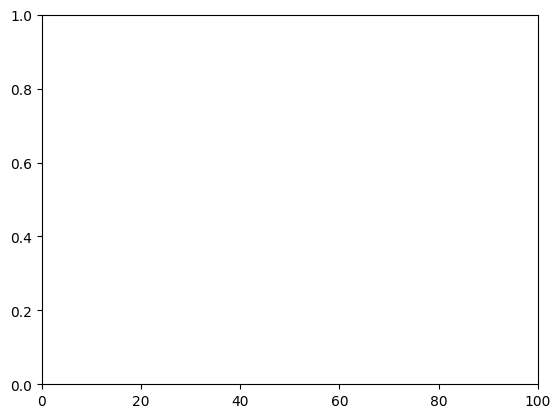

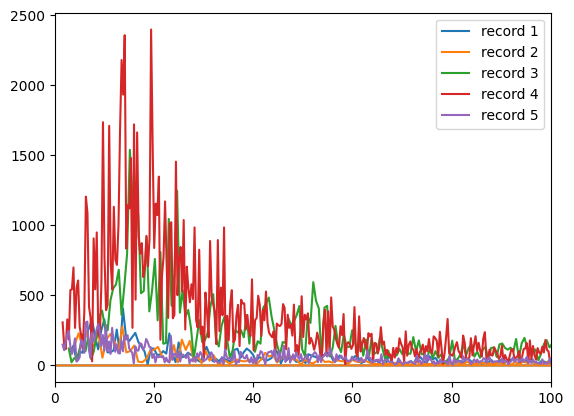

In [7]:
plt.xlim(0,100)
plt.figure()
for x in [1,2,3,4,5]:
    plt.plot(records["z"][x].freqs[5:], records["z"][x].mags[5:], label=f"record {x}")
    print(len(records["z"][x].mags[5:]))
    
plt.legend()
plt.xlim(0,100)
plt.show()


#### Hannas data by accel

In [8]:

x_freq_peaks_1 = [record.freq_peak for record in records["x"] if record.accel == "1"]
y_freq_peaks_1 = [record.freq_peak for record in records["y"] if record.accel == "1"]
z_freq_peaks_1 = [record.freq_peak for record in records["z"] if record.accel == "1"]

x_freq_peaks_2 = [record.freq_peak for record in records["x"] if record.accel == "2"]
y_freq_peaks_2 = [record.freq_peak for record in records["y"] if record.accel == "2"]
z_freq_peaks_2 = [record.freq_peak for record in records["z"] if record.accel == "2"]

# results

print(f"Accel 1:\n"
      f"mean x: {np.mean(x_freq_peaks_1)}, mean y: {np.mean(y_freq_peaks_1)}, mean z: {np.mean(z_freq_peaks_1)}\n"
      f"std x: {np.std(x_freq_peaks_1)}, std y: {np.std(y_freq_peaks_1)}, std z: {np.std(z_freq_peaks_1)}\n"
      f"var x: {np.var(x_freq_peaks_1)}, var y: {np.var(y_freq_peaks_1)}, var z: {np.var(z_freq_peaks_1)}\n")

print(f"Accel 2:\n"
      f"mean x: {np.mean(x_freq_peaks_2)}, mean y: {np.mean(y_freq_peaks_2)}, mean z: {np.mean(z_freq_peaks_2)}\n"
      f"std x: {np.std(x_freq_peaks_2)}, std y: {np.std(y_freq_peaks_2)}, std z: {np.std(z_freq_peaks_2)}\n"
      f"var x: {np.var(x_freq_peaks_2)}, var y: {np.var(y_freq_peaks_2)}, var z: {np.var(z_freq_peaks_2)}\n")



Accel 1:
mean x: 14.5929026458357, mean y: 10.866084549998691, mean z: 19.514886935950965
std x: 20.487480385375648, std y: 28.002017943730415, std z: 21.49100054231151
var x: 419.73685254115185, var y: 784.1130089210001, var z: 461.8631043096336

Accel 2:
mean x: 13.838022089565776, mean y: 57.562613095223014, mean z: 14.491951218184546
std x: 2.1340556699075366, std y: 25.347090938828803, std z: 2.8151767761285993
var x: 4.5541936022645055, var y: 642.4750190612572, var z: 7.925220280853813



### Plotting some of the segments from Hanna's data for accel 1 or 2

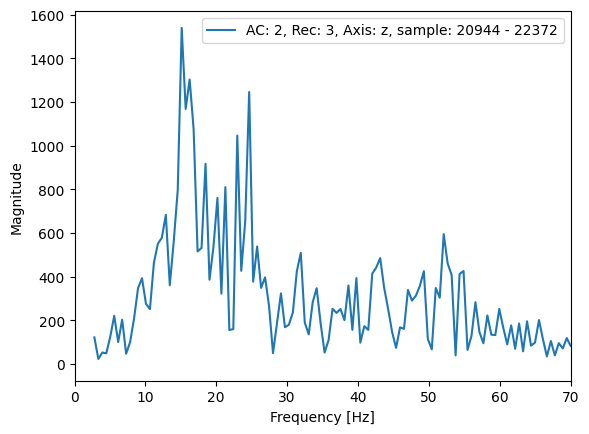

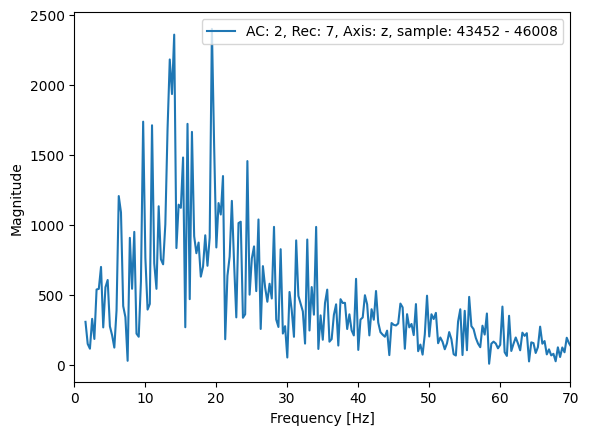

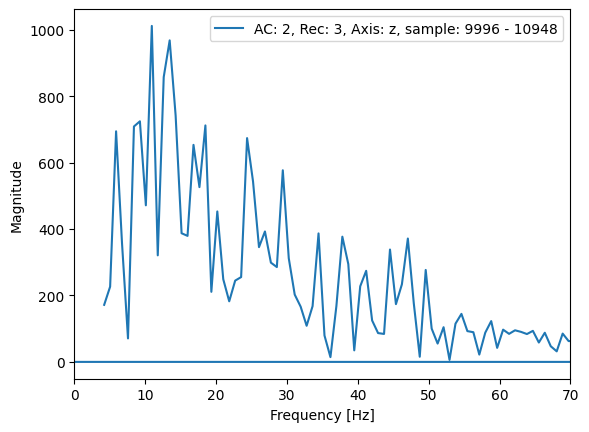

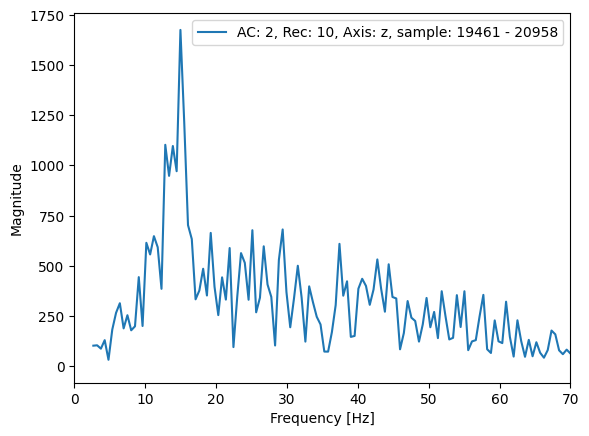

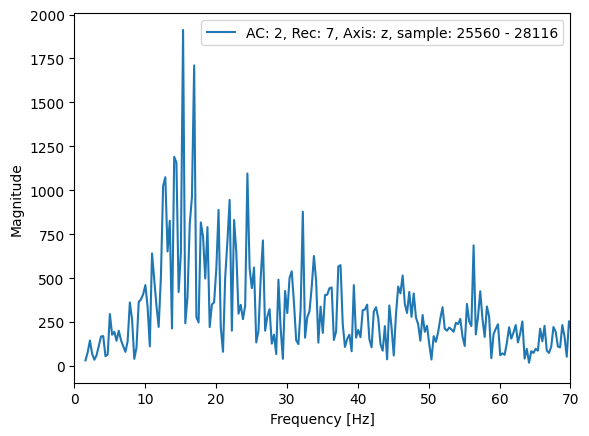

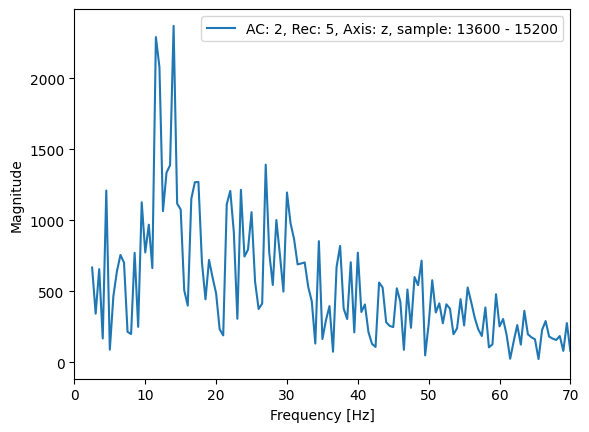

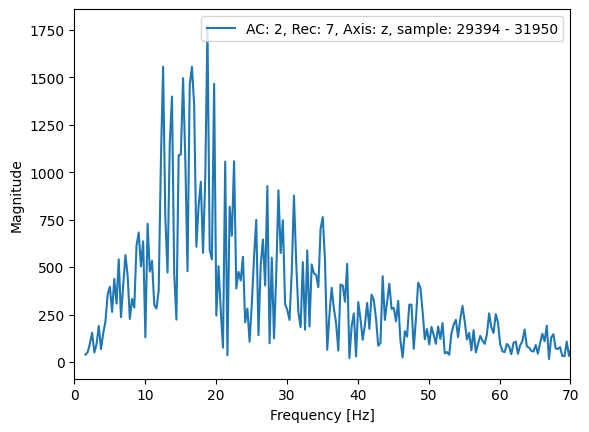

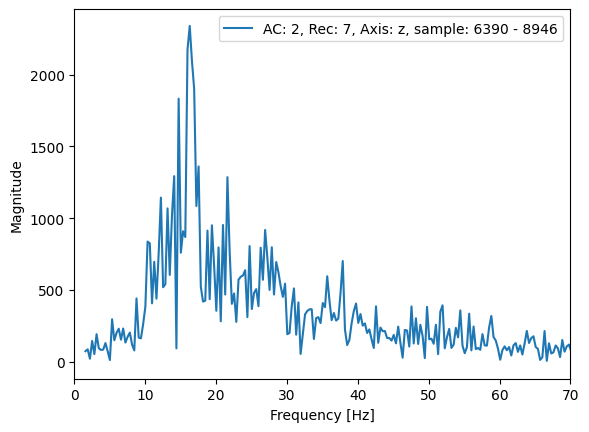

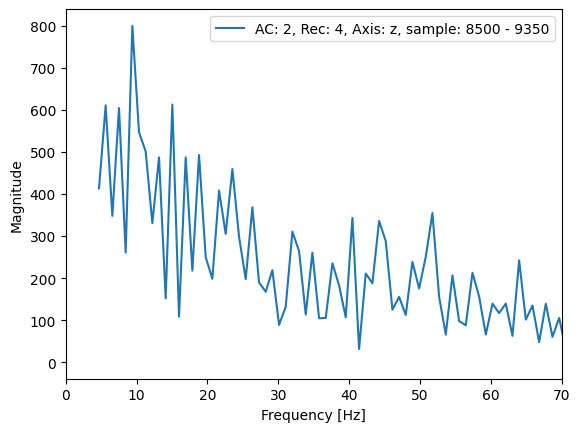

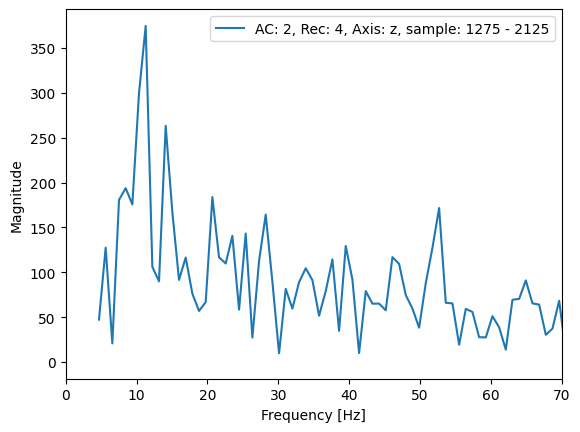

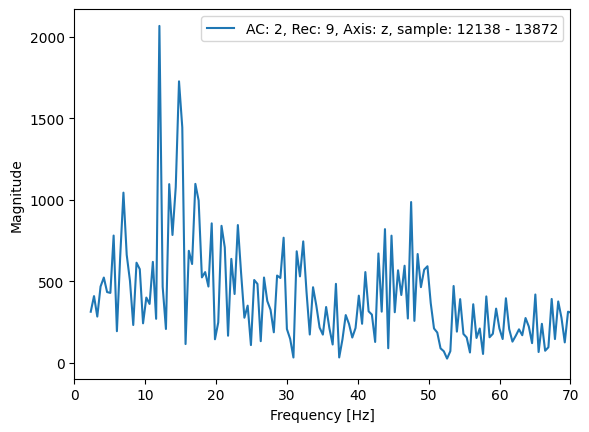

In [10]:
# params
axis = "z"
ac = "2"

for i, rec in enumerate([record for record in records[axis] if record.accel == ac]):
    if i > 10:
        break
    plt.figure()
    plt.xlim(0,70)
    plt.plot(rec.freqs[5:], rec.mags[5:], label=f"AC: {rec.accel}, Rec: {rec.record}, Axis: {rec.coord}, sample: {rec.metadata['start_idx']} - {rec.metadata['end_idx']}")
    plt.legend()
    plt.ylabel("Magnitude")
    plt.xlabel("Frequency [Hz]")
    plt.savefig(f"plots/raw_fft_Hanna/{rec.coord}_{rec.accel}_{rec.record}_{rec.metadata['start_idx']}_{rec.metadata['end_idx']}.png")
    
        


### Eriks data
filter based on:
- Records in range 11-19
- Accelerometer: Both

In [9]:
# filter
filter = {
    "record": ["11", "12", "13", "14", "15", "16", "17", "18", "19"], # skip record 0, it was a test run
    "accel": ["1","2"]
}

# result_path = pathlib.Path("fft_env_savgol_detrend_height/")
records = {
    "x": [],
    "y": [],
    "z": []
}

for file in result_path.iterdir():
    if file.is_file():
        data = load_data(filter, file)
        if data:
            records[data.coord].append(data)

x_freq_peaks = [record.freq_peak for record in records["x"]]
y_freq_peaks = [record.freq_peak for record in records["y"]]
z_freq_peaks = [record.freq_peak for record in records["z"]]

np.mean(x_freq_peaks), np.mean(y_freq_peaks), np.mean(z_freq_peaks)

(np.float64(8.606017844818675),
 np.float64(32.123617569080224),
 np.float64(17.268233138783575))

In [10]:

x_freq_peaks_1 = [record.freq_peak for record in records["x"] if record.accel == "1"]
y_freq_peaks_1 = [record.freq_peak for record in records["y"] if record.accel == "1"]
z_freq_peaks_1 = [record.freq_peak for record in records["z"] if record.accel == "1"]

x_freq_peaks_2 = [record.freq_peak for record in records["x"] if record.accel == "2"]
y_freq_peaks_2 = [record.freq_peak for record in records["y"] if record.accel == "2"]
z_freq_peaks_2 = [record.freq_peak for record in records["z"] if record.accel == "2"]

# results

print(f"Accel 1:\n"
      f"mean x: {np.mean(x_freq_peaks_1)}, mean y: {np.mean(y_freq_peaks_1)}, mean z: {np.mean(z_freq_peaks_1)}\n"
      f"std x: {np.std(x_freq_peaks_1)}, std y: {np.std(y_freq_peaks_1)}, std z: {np.std(z_freq_peaks_1)}\n"
      f"var x: {np.var(x_freq_peaks_1)}, var y: {np.var(y_freq_peaks_1)}, var z: {np.var(z_freq_peaks_1)}\n")

print(f"Accel 2:\n"
      f"mean: x: {np.mean(x_freq_peaks_2)}, y: {np.mean(y_freq_peaks_2)}, z: {np.mean(z_freq_peaks_2)}\n"
      f"std: x: {np.std(x_freq_peaks_2)}, y: {np.std(y_freq_peaks_2)}, z: {np.std(z_freq_peaks_2)}\n"
      f"var: x: {np.var(x_freq_peaks_2)}, y: {np.var(y_freq_peaks_2)}, z: {np.var(z_freq_peaks_2)}\n")



Accel 1:
mean x: 4.993784039279861, mean y: 5.859486425785566, mean z: 18.7046330288674
std x: 1.7740792563348418, std y: 6.183368756824929, std z: 15.86497353770616
var x: 3.147357207757585, var y: 38.234049182878664, var z: 251.69738535211667

Accel 2:
mean: x: 11.879604731088225, y: 53.612452140866765, z: 15.962415056889194
std: x: 4.5433644775017745, y: 23.693319094006938, z: 3.7080710612345404
var: x: 20.642160775424973, y: 561.3733696904337, z: 13.749790995165052

